# Descripción del proyecto

**Introducción**

Zuber, una nueva empresa de viajes compartidos en Chicago, busca identificar patrones en los datos de sus competidores para comprender mejor las preferencias de los pasajeros y el impacto de factores externos, como el clima, en la demanda de servicios. Este análisis es esencial para Zuber, ya que le permitirá optimizar sus operaciones y ofrecer un servicio que se ajuste a las necesidades de los clientes.

El objetivo principal de este proyecto es explorar dos aspectos clave:

* Preferencias de los pasajeros: Analizando el número de viajes realizados por diferentes compañías de taxi en Chicago, evaluaremos la popularidad y la demanda de cada empresa. Esto permitirá identificar las empresas de taxi con mayor demanda y analizar posibles tendencias en el comportamiento de los usuarios.

* Impacto del clima en la frecuencia de los viajes: Al comparar los datos de los viajes con las condiciones climáticas, intentaremos probar una hipótesis sobre cómo las condiciones del tiempo pueden influir en la frecuencia de los viajes. Específicamente, evaluaremos si existe una diferencia en la duración promedio de los viajes entre días con clima bueno y malo.

Para llevar a cabo este análisis, utilizaremos dos conjuntos de datos:

* /datasets/project_sql_result_01.csv: Contiene el número de viajes realizados por cada compañía de taxis el 15 y 16 de noviembre de 2017, especificando el nombre de la compañía y el total de viajes.

* /datasets/project_sql_result_04.csv: Incluye información sobre los barrios de Chicago donde terminaron los viajes y el promedio de viajes que finalizaron en cada barrio durante noviembre de 2017.

Este enfoque nos permitirá no solo entender la demanda actual en el sector, sino también formular recomendaciones estratégicas para que Zuber pueda destacarse en el competitivo mercado de los viajes compartidos.

# Análisis exploratorio de datos

In [1]:
#Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importar el primer archivo
company_trips_df = pd.read_csv('/datasets/project_sql_result_01.csv')
#Importar el segundo archivo
dropoff_trips_df = pd.read_csv('/datasets/project_sql_result_04.csv')
#Importar el archivo para hipótesis
data_loop_ohare= pd.read_csv('/datasets/project_sql_result_07.csv')

In [3]:
#Verificar si se cargó correctamente el archivo
company_trips_df.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [4]:
#Verificar si se cargó correctamente el archivo
dropoff_trips_df.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [5]:
#Verificar información general del dataset 'company_trips_df'
company_trips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


Este DataFrame es pequeño y contiene 64 filas de datos completos sobre compañías de taxis y el número de viajes realizados por cada una. La estructura y los tipos de datos son apropiados para análisis y visualización sin necesidad de limpieza adicional en términos de valores nulos.

In [6]:
#Obtener estadísticas descriptivas
company_trips_df.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


* La media o promedio de los viajes es de aproximadamente 2145.48. Esto sugiere que, en promedio, las compañías de taxis realizaron alrededor de 2145 viajes. Sin embargo, dado el alto valor de la desviación estándar, es probable que esta media esté influenciada por algunos valores muy altos.

* La desviación estándar es de aproximadamente 3812.31, lo cual es bastante alta en comparación con la media. Esto indica que hay una gran variabilidad en el número de viajes realizados por las compañías. Los datos están bastante dispersos, y es probable que haya compañías que realizaron muchos más o muchos menos viajes que el promedio.

* El valor mínimo en esta columna es 2, lo que significa que hay al menos una compañía que solo realizó 2 viajes. Este valor bajo confirma que hay compañías con una cantidad muy baja de viajes, lo cual contribuye a la alta variabilidad en los datos.

* El valor máximo es 19,558 viajes, lo cual es muy superior a la media y la mediana. Este valor máximo corresponde a la compañía con mayor cantidad de viajes, y confirma la presencia de valores atípicos que influyen en el promedio general.

In [7]:
#Verificar información general del dataset 'drop_off_trips_df'
dropoff_trips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [8]:
#Cambiar el tipo de dato de la columna 'average_trips' a entero
dropoff_trips_df['average_trips'] = dropoff_trips_df.average_trips.astype('int')

Dado que la columna 'average_trips' representa un número de viajes promedio, el valor debería ser un número entero, ya que es poco probable que el número promedio de viajes sea útil en decimales. Un viaje es una unidad discreta, por lo que usar enteros para representarlos es más adecuado.

In [9]:
#Verificar el cambio
dropoff_trips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dropoff_location_name  94 non-null     object
 1   average_trips          94 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [10]:
#Verificar el dataset
dropoff_trips_df.head()

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546


In [11]:
#Obtener estadísticas descriptivas
dropoff_trips_df.describe()

,average_trips
count,94.000000
mean,599.478723
std,1714.555974
min,1.000000
25%,14.000000
50%,51.500000
75%,298.750000
max,10727.000000


In [12]:
# Verificar registros duplicados en 'company_trips_df'
duplicados_company = company_trips_df.duplicated().sum()
print(f"Registros duplicados en 'company_trips_df': {duplicados_company}")

# Verificar registros duplicados en 'dropoff_trips_df'
duplicados_dropoff = dropoff_trips_df.duplicated().sum()
print(f"Registros duplicados en 'dropoff_trips_df': {duplicados_dropoff}")

Registros duplicados en 'company_trips_df': 0
Registros duplicados en 'dropoff_trips_df': 0


* La media o promedio es de aproximadamente 599.48 viajes. Esto sugiere que, en promedio, las áreas de destino tienen alrededor de 599 viajes. Sin embargo, este valor medio puede estar sesgado debido a algunos valores muy altos, como se indica por la gran desviación estándar.

* La desviación estándar es bastante alta, aproximadamente 1714.56. Esto sugiere que hay una gran variabilidad en el número de viajes promedio en las áreas de destino. Una desviación estándar tan alta indica que los valores están muy dispersos, con algunos valores considerablemente superiores al promedio.

* El valor mínimo de average_trips es 1, lo que indica que hay áreas de destino donde se realizaron muy pocos viajes. Esto sugiere que algunas áreas son mucho menos populares o tienen menos demanda.

* El valor máximo es 10,727 viajes, lo cual es extremadamente alto en comparación con la media y la mediana. Este valor representa el área de destino con la mayor cantidad de viajes y confirma la presencia de valores atípicos significativos que influyen fuertemente en el promedio.

* Adicionalmente, se verificó que no hay registros duplicados en los dos datasets. Con esta verificación, sabemos que los datos utilizados para el análisis son únicos y no están afectados por duplicados

In [13]:
#Identificar los 10 principales barrios en términos de finalización del recorrido
top_10_neighborhoods= dropoff_trips_df.sort_values('average_trips', ascending=False).head(10)

In [14]:
#Imprimir
top_10_neighborhoods

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


In [15]:
# Establecer la columna 'dropoff_location_name' como índice
top_10_neighborhoods = top_10_neighborhoods.set_index('dropoff_location_name')

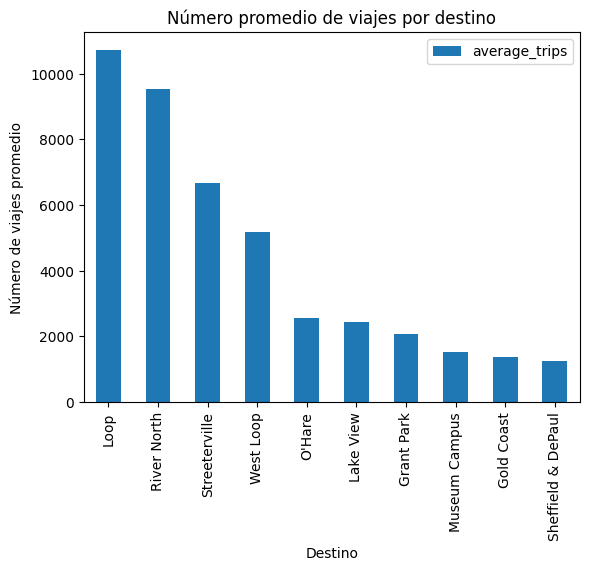

In [16]:
#Graficar los datos
top_10_neighborhoods.plot(kind='bar')
plt.xlabel('Destino')
plt.ylabel('Número de viajes promedio')
plt.title('Número promedio de viajes por destino')
plt.show()

Distribución de Viajes por Destino:

* En el gráfico anterior, Loop lidera claramente en cuanto al número promedio de viajes, seguido por River North y Streeterville. Estos barrios parecen ser los destinos más populares para los usuarios de Zuber, lo cual podría estar relacionado con su centralidad y densidad de actividades.

* El alto promedio de viajes en estos barrios sugiere que son áreas concurridas y posiblemente céntricas, lo cual es común en zonas comerciales y turísticas.

* Barrios como Grant Park, Museum Campus, y Gold Coast también están en el top 10, pero con números significativamente más bajos. Esto sugiere que, si bien son populares, no alcanzan la actividad de las áreas más céntricas como el Loop y River North.

In [17]:
#Identificar las 10 compañías con mayor número de viajes
top_10_companies= company_trips_df.sort_values('trips_amount', ascending=False).head(10)

In [18]:
#Imprimir
top_10_companies

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [19]:
#Establecer la columna 'company_name' como índice
top_10_companies = top_10_companies.set_index('company_name')

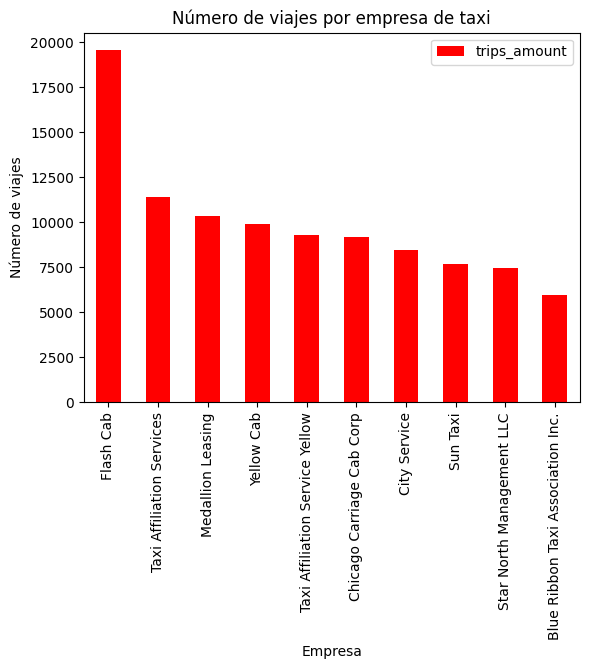

In [20]:
#Graficar los datos
top_10_companies.plot(kind='bar', color='red').set_title('Número de viajes por empresa de taxi')
plt.xlabel('Empresa')
plt.ylabel('Número de viajes')
plt.show()

Distribución de Viajes por Empresa:

* La empresa Flash Cab lidera con una diferencia notable, con casi 20,000 viajes, casi el doble del segundo lugar, Taxi Affiliation Services. Esto puede indicar una fuerte presencia de esta compañía en la ciudad o una estrategia de servicio que ha resonado bien con los clientes.

* Las siguientes empresas, como Medallion Leasing y Yellow Cab, muestran una competencia cerrada en términos de viajes, lo cual sugiere un mercado relativamente competitivo.

* La diferencia en el número de viajes entre las principales empresas podría estar vinculada a factores como tamaño de la flota, área de servicio, reputación o relación con servicios de viajes compartidos.

**Conclusiones:**

Los destinos más populares y las empresas con mayor número de viajes ofrecen a Zuber una buena referencia para planificar su propio despliegue. La concentración de viajes en el Loop y River North indica que es crucial enfocar recursos en estas áreas para atender la demanda.

En cuanto a la competencia, aunque Flash Cab domina el mercado de taxis, hay otras empresas que también tienen una gran participación. Esto podría ser una señal de que el mercado es dinámico y permite la entrada de nuevas opciones, lo cual podría beneficiar a Zuber al encontrar su nicho.

# Prueba de hipótesis

**Hipótesis:**

"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

In [21]:
#Verificar información general
data_loop_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


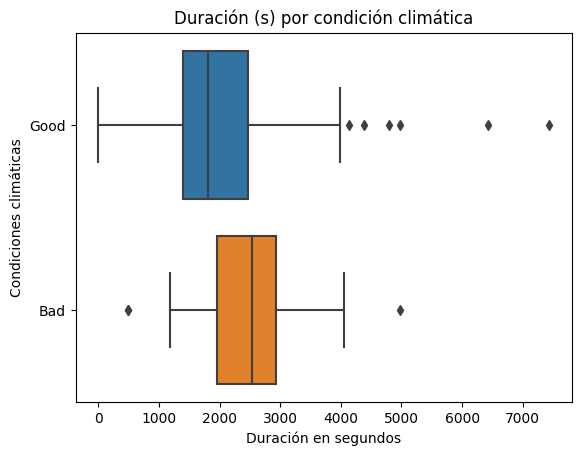

In [22]:
#Crear un diagrama de caja
sns.boxplot(x='duration_seconds', y='weather_conditions', data=data_loop_ohare).set_title('Duración (s) por condición climática')
plt.xlabel('Duración en segundos')
plt.ylabel('Condiciones climáticas')
plt.show()

Vamos a quitar lo outliers, porque pueden distorsionar la representación gráfica de los datos. Al eliminarlos, el diagrama se vuelve más claro y fácil de interpretar, mostrando mejor la tendencia central y la dispersión del conjunto de datos.

In [23]:
Q1 = data_loop_ohare['duration_seconds'].quantile(0.25)

In [24]:
Q1

1438.25

In [25]:
Q3 = data_loop_ohare['duration_seconds'].quantile(0.75)

In [26]:
Q3

2580.0

In [27]:
IQR = Q3-Q1

In [28]:
IQR

1141.75

In [29]:
lower_limit = Q1-(1.5*IQR)

In [30]:
upper_limit = Q3+(1.5*IQR)

In [31]:
data_without_outliers = data_loop_ohare.query('duration_seconds <= @upper_limit')
data_without_outliers = data_without_outliers.query('duration_seconds >= @lower_limit')

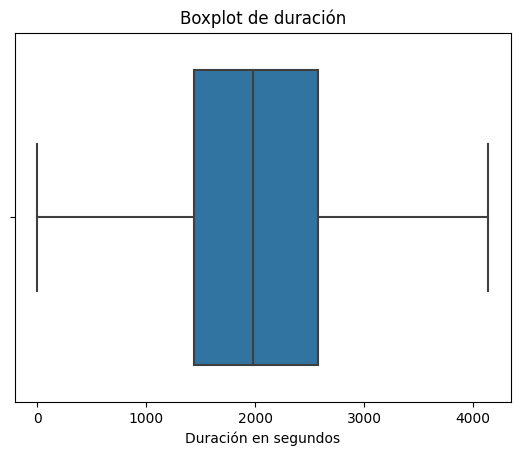

In [32]:
#Graficar diagrama de caja sin outliers
sns.boxplot(x='duration_seconds', data=data_without_outliers).set_title('Boxplot de duración')
plt.xlabel('Duración en segundos')
plt.show()

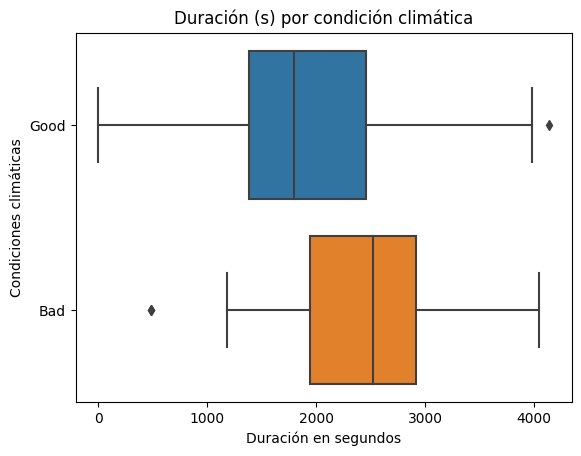

In [33]:
#Graficar diagrama de caja sin outliers según condición climática
sns.boxplot(x='duration_seconds', y='weather_conditions', data=data_without_outliers).set_title('Duración (s) por condición climática')
plt.xlabel('Duración en segundos')
plt.ylabel('Condiciones climáticas')
plt.show()

In [34]:
#Importar librerías estadísticas
from scipy import stats as st

In [35]:
#Asignar el valor alpha
alpha = 0.5

In [36]:
condición_buena = data_without_outliers.query('weather_conditions == "Good"')['duration_seconds']

In [37]:
condición_mala = data_without_outliers.query('weather_conditions == "Bad"')['duration_seconds']

H0 = Los promedios de duración del viaje son iguales para las dos condicones climáticas

H1 = Los promedios de duración del viaje son diferentes entre condiciones climáticas

In [38]:
#Realizar prueba ttest
results = st.ttest_ind(condición_buena, condición_mala)

In [39]:
#Imprimir re
print('p_value', results.pvalue)

p_value 1.2430038032744411e-13


In [40]:
if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')

Rechazamos la hipótesis nula


In [41]:
results_v = st.levene(condición_buena, condición_mala)

H0 = Las varianzas de duración del viaje son iguales para las dos condicones climáticas

H1 = Las varianzas de duración del viaje son diferentes entre condiciones climáticas

In [42]:
if results_v.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')

No podemos rechazar la hipótesis nula


In [44]:
# Importar librerías estadísticas
from scipy import stats as st

# Asignar el valor alpha
alpha = 0.05

# Filtrar los datos por condición climática
condición_buena = data_without_outliers.query('weather_conditions == "Good"')['duration_seconds']
condición_mala = data_without_outliers.query('weather_conditions == "Bad"')['duration_seconds']

# Hipótesis
H0_var = "Las varianzas de duración del viaje son iguales para las dos condiciones climáticas"
H1_var = "Las varianzas de duración del viaje son diferentes entre condiciones climáticas"
H0 = "Los promedios de duración del viaje son iguales para las dos condiciones climáticas"
H1 = "Los promedios de duración del viaje son diferentes entre condiciones climáticas"

# Realizar prueba de Levene para igualdad de varianzas
results_v = st.levene(condición_buena, condición_mala)
print("p_value de la prueba de Levene:", results_v.pvalue)

# Interpretar resultado de la prueba de Levene
if results_v.pvalue < alpha:
    print("Rechazamos la hipótesis nula de varianzas iguales:", H1_var)
    equal_var = False
else:
    print("No podemos rechazar la hipótesis nula de varianzas iguales:", H0_var)
    equal_var = True

# Realizar prueba t-test con el valor determinado de equal_var
results = st.ttest_ind(condición_buena, condición_mala, equal_var=equal_var)
print("p_value de la prueba t:", results.pvalue)

# Interpretar resultado de la prueba t
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula:", H1)
else:
    print("No podemos rechazar la hipótesis nula:", H0)


p_value de la prueba de Levene: 0.6196707782686355
No podemos rechazar la hipótesis nula de varianzas iguales: Las varianzas de duración del viaje son iguales para las dos condiciones climáticas
p_value de la prueba t: 1.2430038032744411e-13
Rechazamos la hipótesis nula: Los promedios de duración del viaje son diferentes entre condiciones climáticas


Con los resultados obtenidos, podemos concluir lo siguiente:

Prueba de Levene: El valor p fue de 0.62, que es mayor que el nivel de significancia de 0.05. Esto indica que no tenemos suficiente evidencia para rechazar la hipótesis nula de igualdad de varianzas. Por lo tanto, asumimos que las varianzas de duración del viaje son iguales entre las condiciones climáticas.

Prueba t: Con el valor p bajo, que está muy por debajo de 0.05, rechazamos la hipótesis nula de igualdad de medias. Esto sugiere que hay una diferencia significativa en la duración promedio del viaje entre condiciones climáticas buenas y malas.

**Interpretación**

La diferencia en los promedios de duración del viaje entre condiciones climáticas buenas y malas es estadísticamente significativa. Esto implica que las condiciones climáticas pueden influir en la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare, con una duración significativamente distinta en días con mal tiempo.

* Para probar las hipótesis, utilicé la prueba t de Student (t-test) para muestras independientes. Elegí esta prueba porque me permite comparar las medias de dos grupos (en este caso, los tiempos de viaje bajo condiciones climáticas "Good" y "Bad").

* El criterio que utilicé fue un nivel de significancia (alpha) de 0.05. Esto significa que si el valor p obtenido es menor que 0.05, rechazaré la hipótesis nula, sugiriendo que hay una diferencia significativa en las duraciones de los viajes entre las dos condiciones climáticas.

* Después de realizar la prueba, obtuve un p-value de aproximadamente 1.2430038032744411e-13, que es significativamente menor que 0.05. Por lo tanto, rechazo la hipótesis nula, lo que indica que las duraciones promedio de los viajes son diferentes entre las condiciones climáticas "Good" y "Bad".

* También realicé una prueba de Levene para evaluar la igualdad de varianzas entre los grupos. La hipótesis nula para esta prueba establece que las varianzas son iguales. Sin embargo, en este caso, no rechacé la hipótesis nula de igualdad de varianzas, lo que indica que, aunque las medias son diferentes, las varianzas no presentan una diferencia significativa entre las condiciones climáticas.

**Conclusión:**
El boxplot que generé antes de calcular el p-valor, me ayudó a visualizar la distribución de las duraciones de los viajes bajo las diferentes condiciones climáticas, lo que puede corroborar los resultados de la prueba t al mostrar la diferencia en las medianas y rangos intercuartílicos.

En conclusión, los resultados indican que la duración promedio de los viajes sí varía significativamente según las condiciones climáticas, mientras que las varianzas parecen ser similares.